# Data Preparation 

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

In [2]:
df=pd.read_csv('general.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [7]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df=df.fillna(df.median())

On Va changer toutes valeurs Nan par la moyenne 

In [9]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
df.drop("CUST_ID", axis=1, inplace=True)

on enleve le Id du Client car il n'est pas un feature important et n'as rien avoir de notre etude 

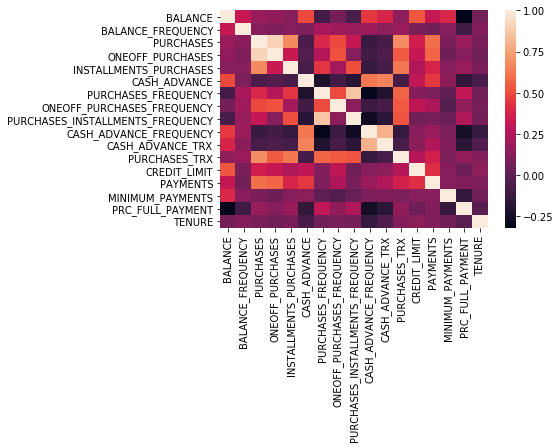

In [11]:
sns.heatmap(df.corr(),
            xticklabels=df.columns,
            yticklabels=df.columns
           )

on va utiliser le Heat map pour decouvrir un peu plus notre data et la correlation qui existe entres nos differents features 

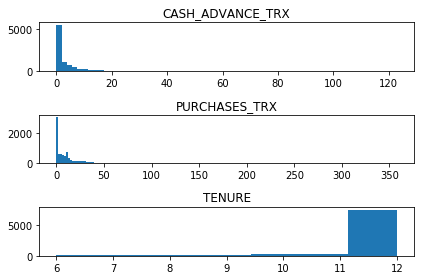

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1)
ax0, ax1, ax2 = axes.flatten()

ax0.hist(df['CASH_ADVANCE_TRX'], 65, histtype='bar')
ax0.set_title('CASH_ADVANCE_TRX')

ax1.hist(df['PURCHASES_TRX'], 173, histtype='bar')
ax1.set_title('PURCHASES_TRX')

ax2.hist(df['TENURE'], 7, histtype='bar')
ax2.set_title('TENURE')

fig.tight_layout()
plt.show()

on a vu que a travers la fonction describe ainsi que ce graph que dans la Data il ya plusieurs valeurs qui sont tres espacées pour cela on devrait standariser les valeurs de notre data 

In [13]:
scaler=StandardScaler()
scaler.fit(df)
scaler.transform(df)

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

# Hierarchical clustering

In [26]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
D_cluster = AgglomerativeClustering(n_clusters=4 )
X_D=D_cluster.fit(df)
Y_pred_D = D_cluster.fit_predict(df)


In [27]:
agg=pd.DataFrame(Y_pred_D)
agg


,0
0,3
1,1
2,1
3,0
4,3
5,3
6,1
7,3
8,0
9,1


ceci montre combien on a de Clusters dans chacun de nos points. ou dans ce cas nos clients .

In [28]:
Z = linkage(df, 'ward')

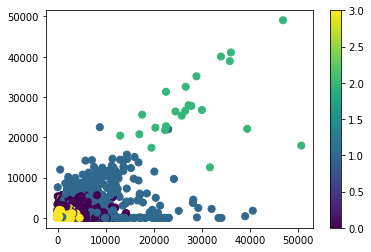

In [29]:
import matplotlib.pyplot as plt
fig= plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(df['PAYMENTS'],df['PURCHASES'],c=agg[0],s=50)
plt.colorbar(scatter)


on remarque a travers le Plot qu'on peut essayer de distinger 4 clusters assez distincts :
- on a d'abord ceux qui ont un large paymenets et qui achetent ennormement 
- ceux qui sont payer moyennemeny mais qui sont aussi des acheteurs assez importants ( c'est le deuxieme groupe d'acheteurs)
- on ceux qui sont payer moyennement a ennormement et qui n'achetent pas du tout.
- on a ceux qui sont peu payer et qui achetent peu.

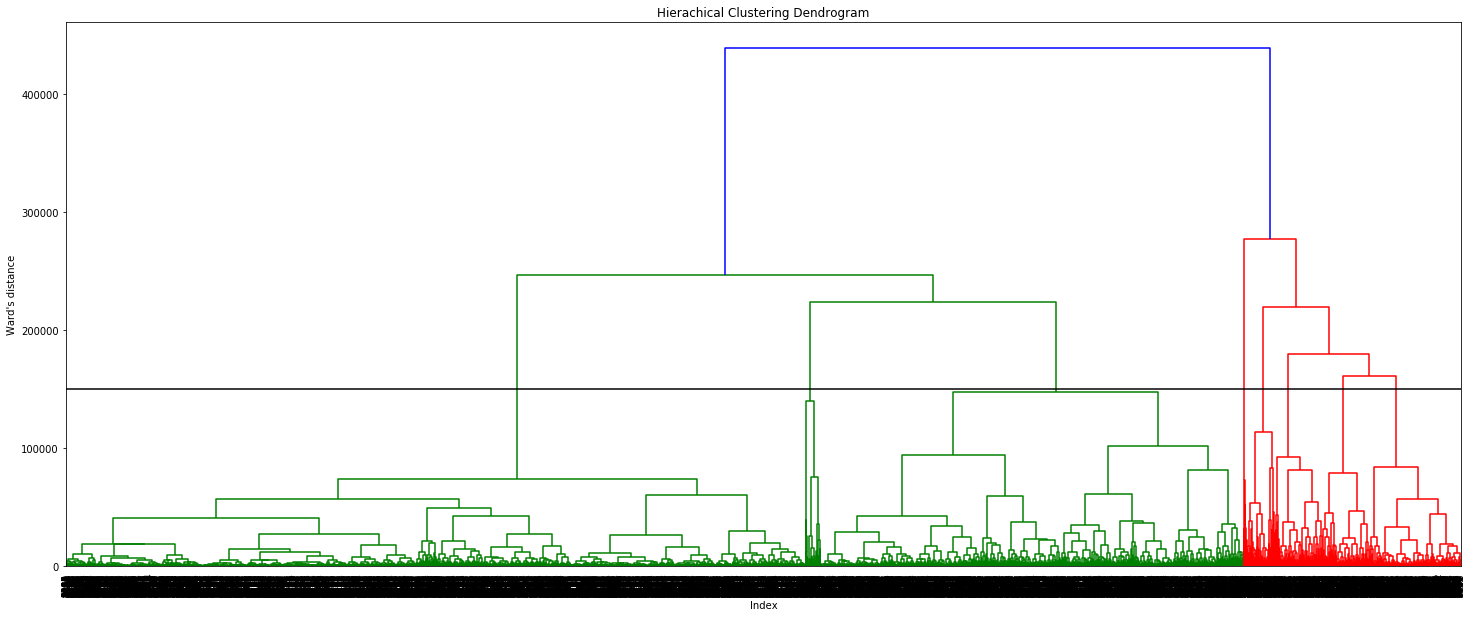

In [30]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(Z,
           leaf_rotation=90.,
           leaf_font_size=9.,);
plt.axhline(150000, c='k');

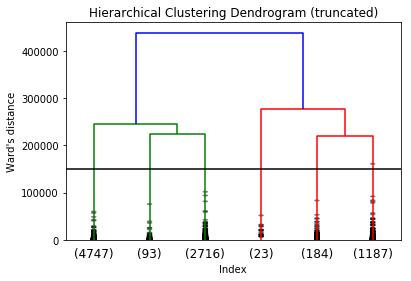

In [31]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Index')
plt.ylabel("Ward's distance")
dendrogram(Z, truncate_mode='lastp',
           p=6, leaf_rotation=0., leaf_font_size=12.,
           show_contracted=True);
plt.axhline(150000, c='k');

ceci est notre dendrogram mais on a essayer a travers la methode truncate a avoir quelques choses de beaucoup plus clair lisible et compact que le dendrogram precedent et on peut voir a travers la ligne noir que on a 6 clusters .

# k-means Method

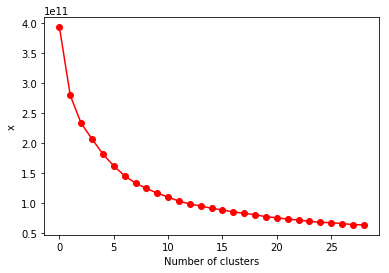

In [20]:
from sklearn.cluster import KMeans
x = []
for i in range( 1, 30 ):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( df)
    x.append( kmeans.inertia_ )
    
plt.plot( x, 'ro-', label="WCSS")
plt.xlabel("Number of clusters")
plt.ylabel("x")
plt.show()

au lieu de choisir plusieurs valeurs aleatoires pour les clusters on utilise la methode du Elbow . D'ou on va prendre la valeur de K-cluster=4.

In [21]:
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300) 
y_pred = kmeans.fit_predict( df)

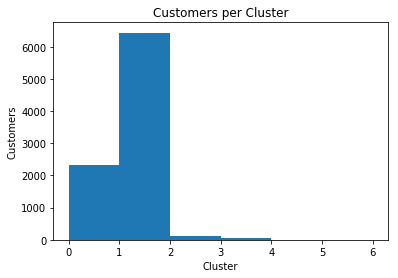

In [22]:
plt.hist(y_pred, bins=range(7))
plt.title('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

ceci represente chaque clients par cluster . on peut ainsi remarquer que le 2 eme cluster est cellui qui contient le plus de clients . c'est a dire la majorité des clients tend a etre dans le 2 eme cluster .

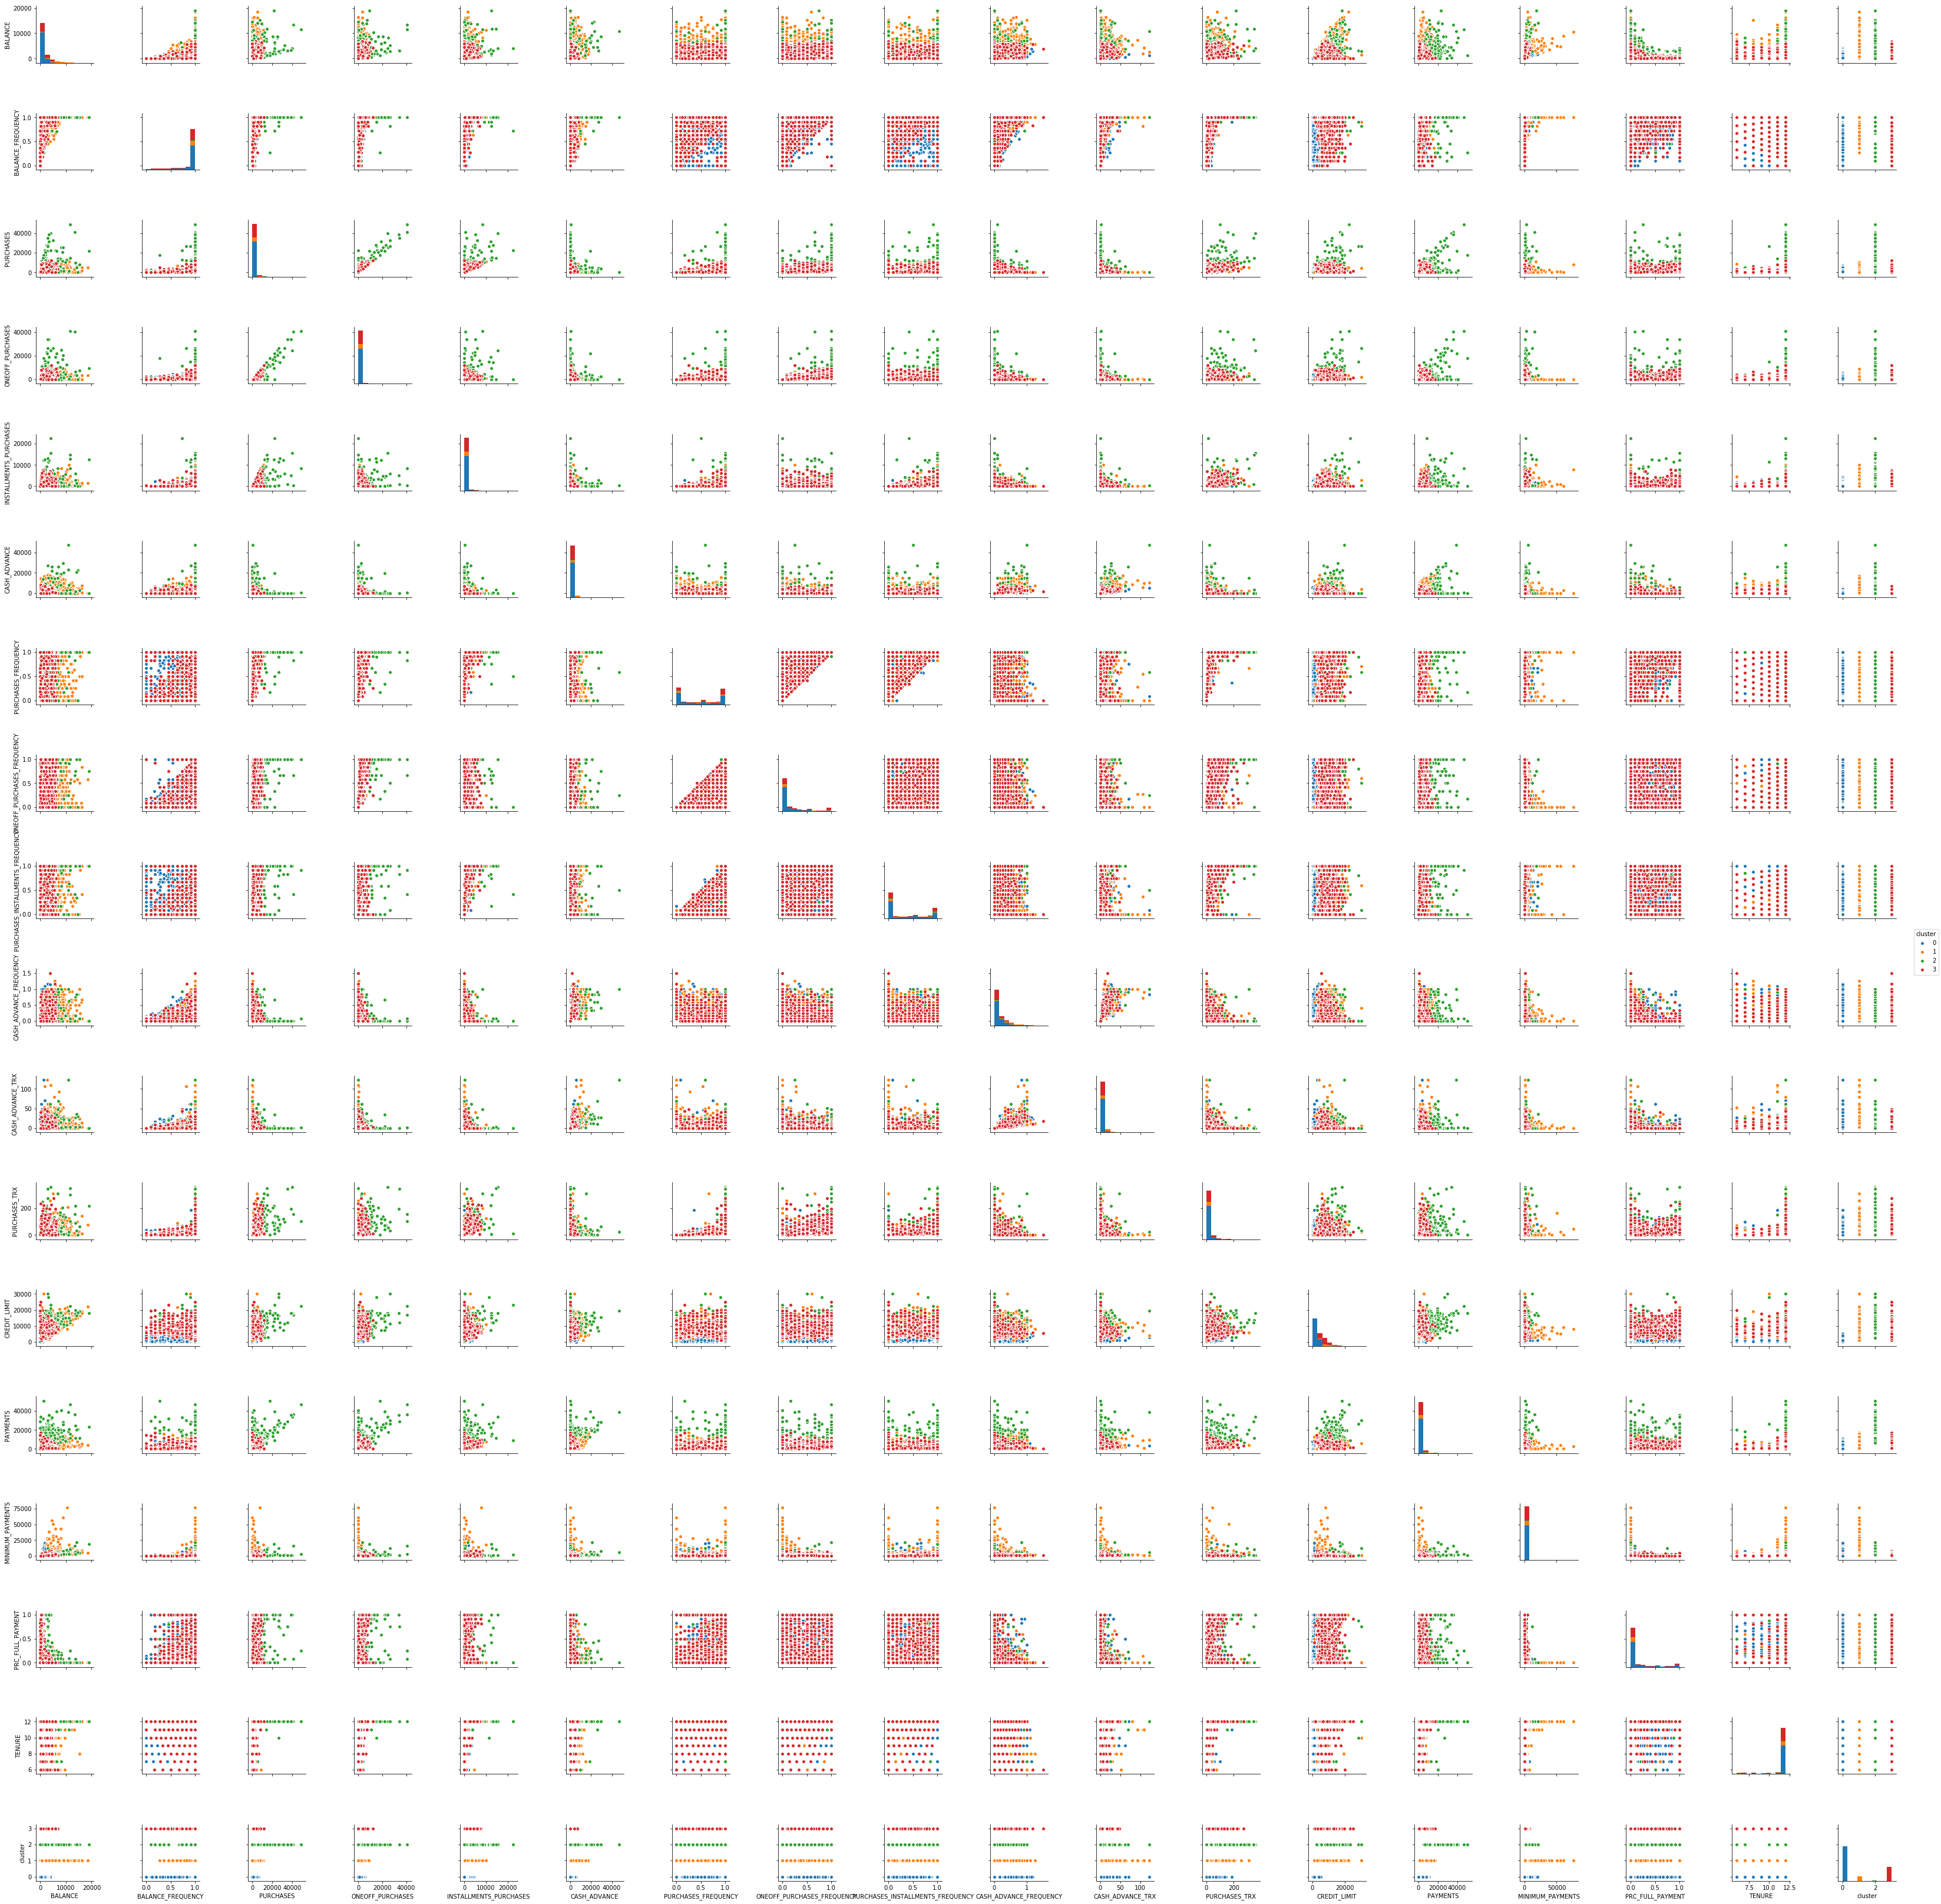

In [24]:
means = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300) 
y_pred = kmeans.fit_predict( df)
  
import seaborn as sns
df["cluster"] = y_pred
cols = list(df.columns)

sns.pairplot( df[ cols ], hue="cluster")

on a essayer de voir ici comment les clusters ont separés notre data . On va ainsi choisir les features que semble le clustering a separer assez clairement .

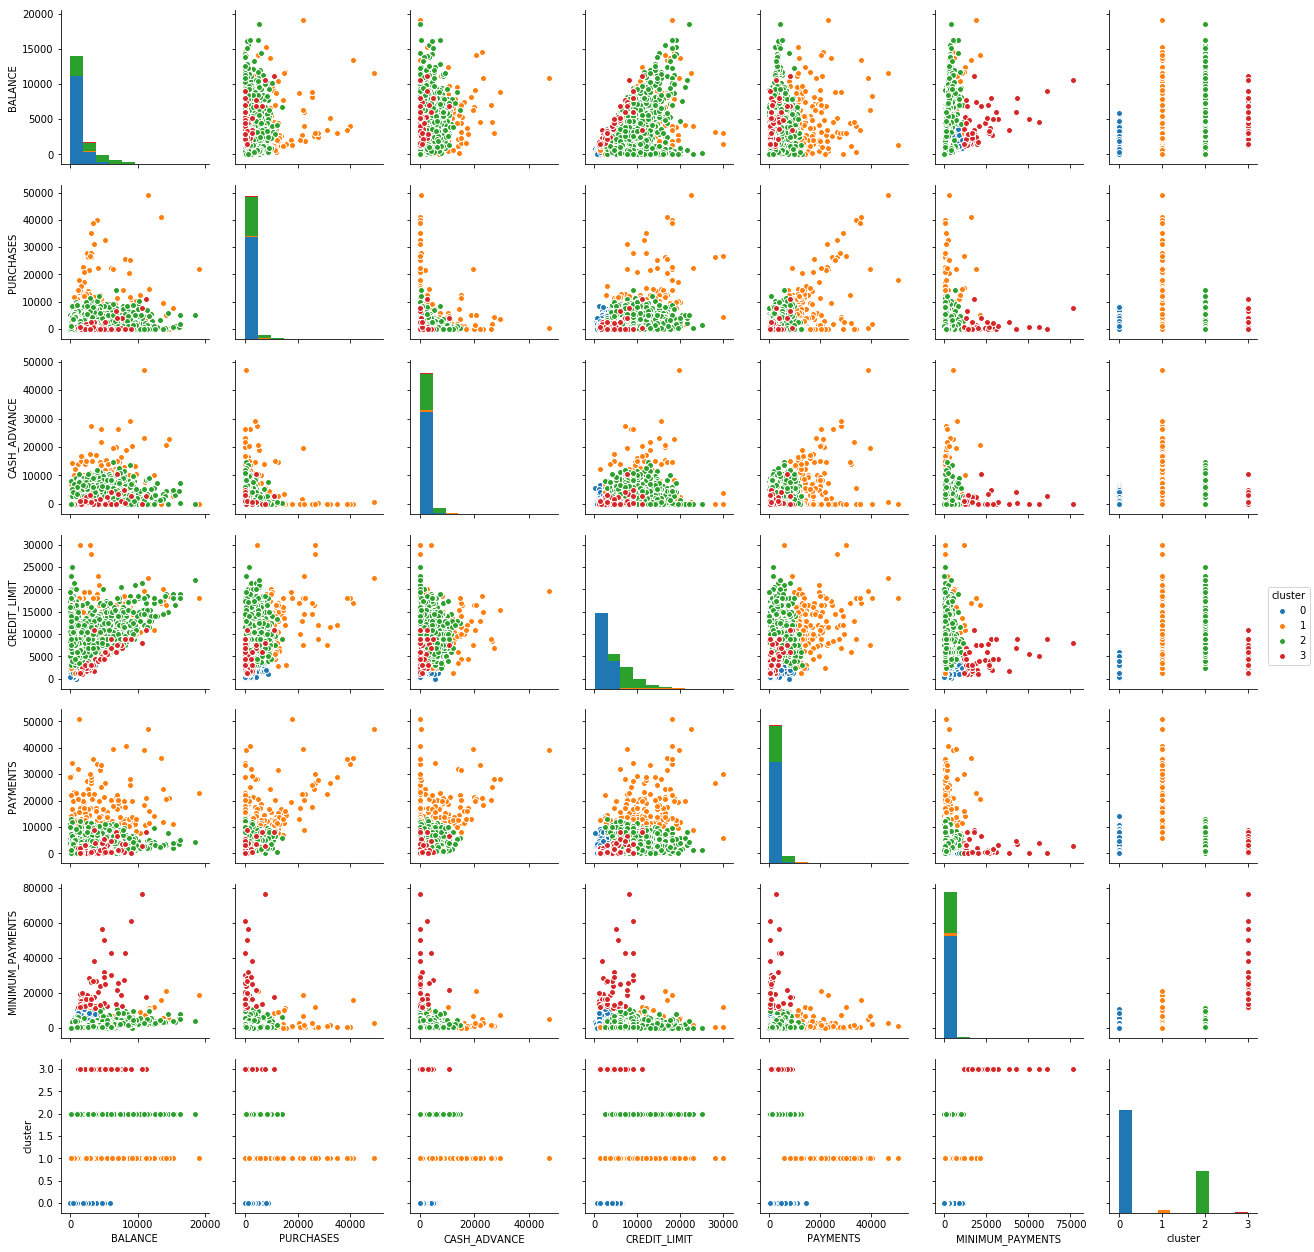

In [25]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300) 
best_vals = df[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

df["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( df[ best_cols ], hue="cluster")

au finale le faite de visualiser nos clusters nous donnent une idee beaucoup plus clair sur nos clients par rapport a tous les features on distingue ainsi :
- on a d'abord ceux qui ont un large paymenets et qui achetent ennormement.
- on ceux qui sont payer moyennement a ennormement et qui n'achetent pas du tout.
- ceux qui sont payer moyennemeny mais qui sont aussi des acheteurs assez importants ( c'est le deuxieme groupe d'acheteurs)
- on a ceux qui sont peu payer et qui achetent peu.
